# Actividad - Regresión Lineal

* **Nombre:José Ángel García López**
* **Matrícula: A01275108**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [23]:
# Carga las librerías necesarias.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np

from sklearn.linear_model import LinearRegression


In [24]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.

df=pd.read_csv(r'C:\Users\drago\Documents\WORKSPACE\tc1002S\datasets\presion.csv')

df.head(6)

,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


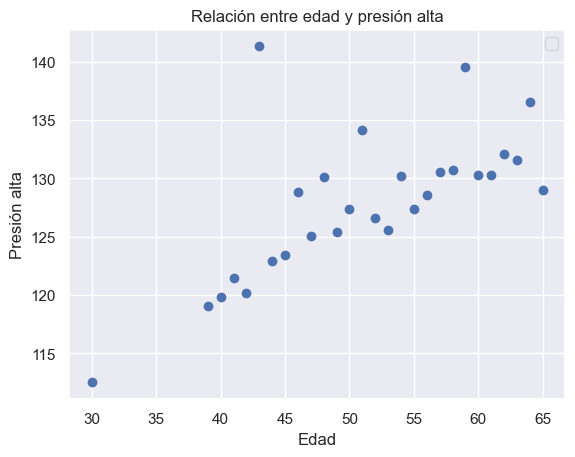

In [25]:
# Grafica la información de la edad y presión alta
plt.scatter(df['Age'], df['Average of ap_hi'])

# Configurar los ejes y la leyenda
plt.xlabel('Edad')
plt.ylabel('Presión alta')
plt.title('Relación entre edad y presión alta')
plt.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


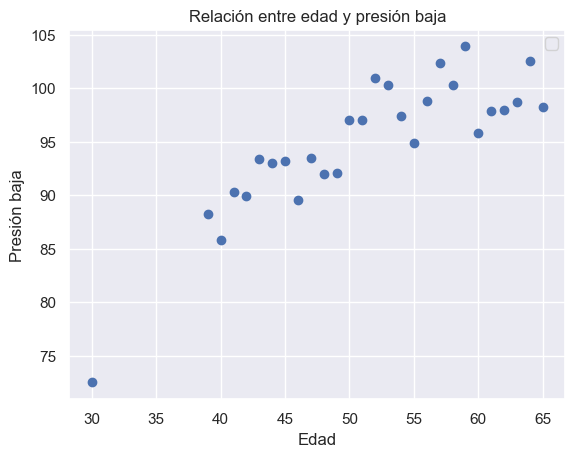

In [22]:
# Grafica la información de la edad y presión Baja
plt.scatter(df['Age'], df['Average of ap_lo'])

# Configurar los ejes y la leyenda
plt.xlabel('Edad')
plt.ylabel('Presión baja')
plt.title('Relación entre edad y presión baja')
plt.legend()

plt.show()

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

C:\Users\drago\AppData\Local\Temp\ipykernel_27332\1671978110.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(df['Age'][:,np.newaxis],df['Average of ap_hi'])


Model slope:   0.47769702977669154
Model intercept:   103.3969740964366


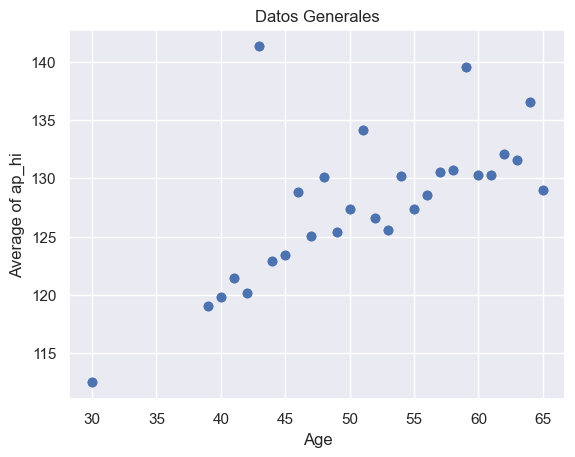

In [134]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
model=LinearRegression(fit_intercept=True)
model.fit(df['Age'][:,np.newaxis],df['Average of ap_hi'])

plt.scatter(data=df,x = 'Age', y= 'Average of ap_hi')

plt.plot(df['Age'], df['Average of ap_hi'], 'o')

plt.xlabel('Age')
plt.ylabel('Average of ap_hi')
plt.title('Datos Generales')


print("Model slope:  ",model.coef_[0])
print("Model intercept:  ",model.intercept_)

C:\Users\drago\AppData\Local\Temp\ipykernel_27332\123707830.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(df['Age'][:,np.newaxis],df['Average of ap_lo'])


Model slope:   0.6089810580238237
Model intercept:   63.726200409422745


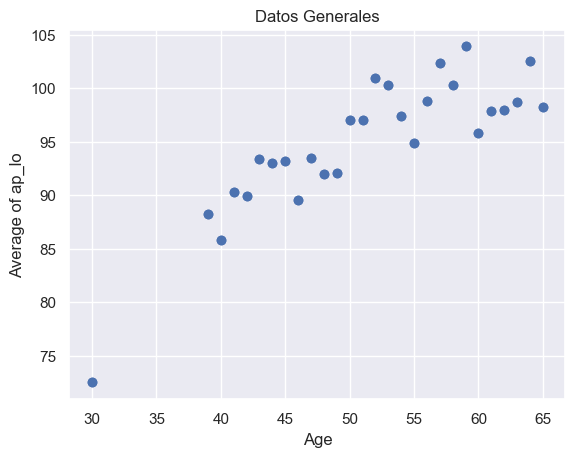

In [135]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
model=LinearRegression(fit_intercept=True)
model.fit(df['Age'][:,np.newaxis],df['Average of ap_lo'])

plt.scatter(data=df,x = 'Age', y= 'Average of ap_lo')

plt.plot(df['Age'], df['Average of ap_lo'], 'o')

plt.xlabel('Age')
plt.ylabel('Average of ap_lo')
plt.title('Datos Generales')

print("Model slope:  ",model.coef_[0])
print("Model intercept:  ",model.intercept_)



Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

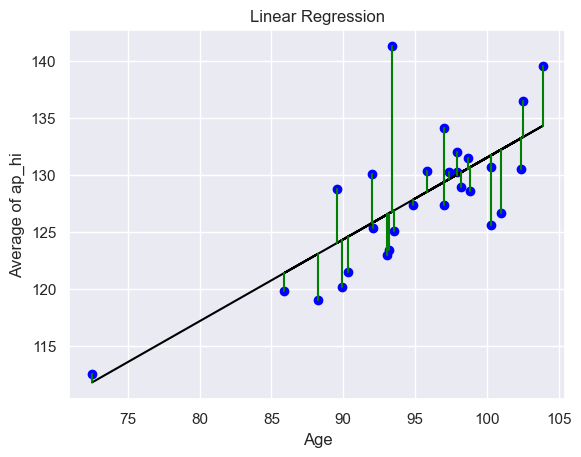

In [130]:
# Presión alta

X = df[['Age']].values
y = df['Average of ap_hi'].values

model_hi = LinearRegression()
model_hi.fit(x, y)

y_pred = model_hi.predict(x)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='black')

# plotear las líneas verdes que representan las distancias entre los datos reales y la recta del modelo
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='green')
    
# agregar etiquetas y título
plt.xlabel('Age')
plt.ylabel('Average of ap_hi')
plt.title('Linear Regression')

plt.show()


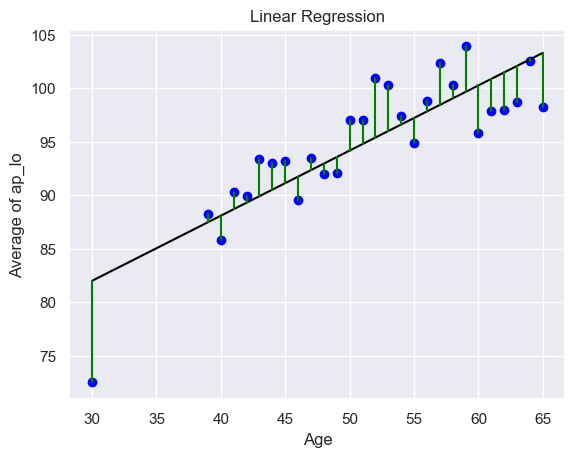

In [136]:
# Presión baja

x = df[['Age']].values
y = df['Average of ap_lo'].values

model_low = LinearRegression()
model_low.fit(x, y)

y_pred = model_low.predict(X)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='black')

# plotear las líneas verdes que representan las distancias entre los datos reales y la recta del modelo
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='green')

# agregar etiquetas y título
plt.xlabel('Age')
plt.ylabel('Average of ap_lo')
plt.title('Linear Regression')

plt.show()

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [132]:
def pressure_low(age):
  presion_lo_edad = model_low.predict([[age]])
  return presion_lo_edad

query_age= 76
pressure_low(query_age)

array([110.00876082])

In [133]:
def pressure_high(age):
  presion_hi_edad = model_hi.predict([[age]])
  return presion_hi_edad

query_age= 76
pressure_high(query_age)

array([114.27125233])

ValueError: Found array with dim 3. LinearRegression expected <= 2.

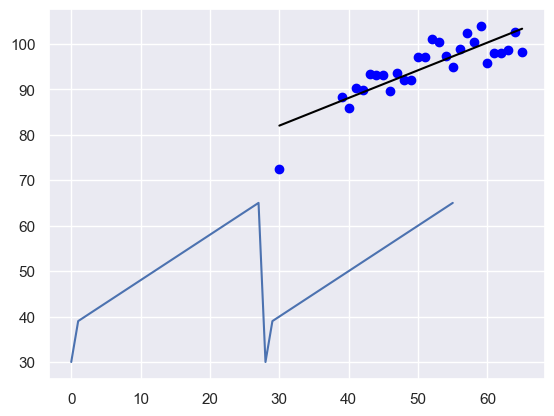

In [142]:
#INTENTO FALLIDO

x = df[['Age']].values
#x = x[:, np.newaxis]
y = df['Average of ap_lo'].values


# ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# predecir los valores de salida usando el modelo ajustado
y_pred = model.predict(X)

# plotear los datos reales y la recta del modelo
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='black')

# plotear las líneas verdes que representan las distancias entre los datos reales y la recta del modelo

plt.plot(np.vstack([x,x])),np.vstack([y,model.predict(x[:,np.newaxis])])
# agregar etiquetas y título
plt.xlabel('Age')
plt.ylabel('Average of ap_lo')
plt.title('Linear Regression')

plt.show()